In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv(r'AirPassengers.csv')

In [4]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
data.shape

(144, 2)

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
#Passengers,144.0,280.298611,119.966317,104.0,180.0,265.5,360.5,622.0


In [13]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

(array([11., 13., 14., 13.,  9., 10., 11.,  7.,  9., 13.,  3., 10.,  6.,
         4.,  4.,  2.,  1.,  2.,  0.,  2.]),
 array([104. , 129.9, 155.8, 181.7, 207.6, 233.5, 259.4, 285.3, 311.2,
        337.1, 363. , 388.9, 414.8, 440.7, 466.6, 492.5, 518.4, 544.3,
        570.2, 596.1, 622. ]),
 <a list of 20 Patch objects>)

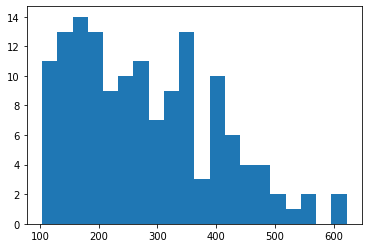

In [18]:
plt.hist(data['#Passengers'],bins=20)

In [23]:
data['Month'] = pd.to_datetime(data['Month'])

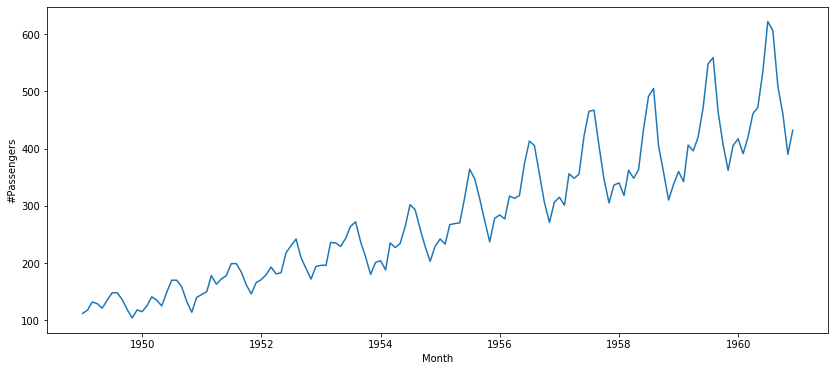

In [28]:
plt.figure(figsize=(14,6))
sns.lineplot(x='Month',y='#Passengers',data=data)

In [37]:
data.rename(columns={'Month':'ds','#Passengers':'y'},inplace=True)

In [32]:
from fbprophet import Prophet

In [33]:
prophet = Prophet()

In [38]:
prophet.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [39]:
future = prophet.make_future_dataframe(periods=12*6,freq='M')

In [44]:
future.shape

(216, 1)

In [45]:
forcast = prophet.predict(future)

In [47]:
data.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [48]:
forcast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,107.305438,56.641784,114.454848,107.305438,107.305438,-21.441736,-21.441736,-21.441736,-21.441736,-21.441736,-21.441736,0.0,0.0,0.0,85.863702
1,1949-02-01,109.453605,51.572446,108.923943,109.453605,109.453605,-30.116981,-30.116981,-30.116981,-30.116981,-30.116981,-30.116981,0.0,0.0,0.0,79.336624
2,1949-03-01,111.393884,81.199026,137.980469,111.393884,111.393884,-0.479840,-0.479840,-0.479840,-0.479840,-0.479840,-0.479840,0.0,0.0,0.0,110.914044
3,1949-04-01,113.542050,78.435402,136.437316,113.542050,113.542050,-4.944334,-4.944334,-4.944334,-4.944334,-4.944334,-4.944334,0.0,0.0,0.0,108.597716
4,1949-05-01,115.620921,84.272698,141.519952,115.620921,115.620921,-3.631653,-3.631653,-3.631653,-3.631653,-3.631653,-3.631653,0.0,0.0,0.0,111.989268


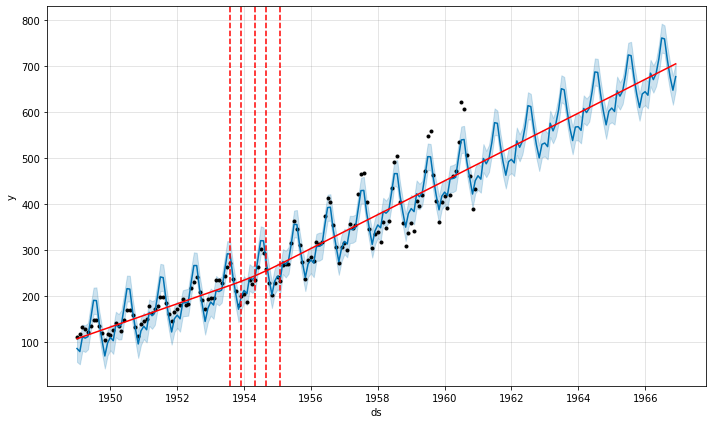

In [51]:
from fbprophet.plot import add_changepoints_to_plot
fig = prophet.plot(forcast)
a = add_changepoints_to_plot(fig.gca(),prophet, forcast)